In [2]:
from google.colab import files
uploaded = files.upload()

Saving id00b70b13.csv to id00b70b13.csv


In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
first = pd.read_csv('id00b70b13.csv', delim_whitespace = True, header = None)
print(first)

                                                        0
0       activity,"time_s","lw_x","lw_y","lw_z","lh_x",...
1       99,0.01,0.039,1.02,-0.02,-0.18,1.234,0.023,0.1...
2       99,0.02,-0.629,-0.461,0.973,-0.246,0.137,0.969...
3       99,0.03,-0.926,-1.262,0.691,0.238,-0.328,1.219...
4       99,0.04,-0.871,-1.496,-0.246,0.711,-0.484,0.41...
...                                                   ...
303296  99,3032.96,0.172,-0.93,-0.32,0,0,0,0.16,0.02,0...
303297  99,3032.97,0.172,-0.93,-0.32,0,0,0,0.156,0.02,...
303298  99,3032.98,0.172,-0.93,-0.32,0,0,0,0.156,0.02,...
303299  99,3032.99,0.172,-0.93,-0.32,0,0,0,0.156,0.02,...
303300  99,3033,0.172,-0.93,-0.32,0,0,0,0.156,0.02,0.9...

[303301 rows x 1 columns]


In [5]:
first = pd.read_csv('id00b70b13.csv')
print(first)

        activity   time_s   lw_x   lw_y   lw_z   lh_x   lh_y   lh_z   la_x  \
0             99     0.01  0.039  1.020 -0.020 -0.180  1.234  0.023  0.156   
1             99     0.02 -0.629 -0.461  0.973 -0.246  0.137  0.969 -0.707   
2             99     0.03 -0.926 -1.262  0.691  0.238 -0.328  1.219 -1.445   
3             99     0.04 -0.871 -1.496 -0.246  0.711 -0.484  0.414 -1.660   
4             99     0.05 -0.727 -1.621 -0.559  1.031 -0.297  0.145 -1.762   
...          ...      ...    ...    ...    ...    ...    ...    ...    ...   
303295        99  3032.96  0.172 -0.930 -0.320  0.000  0.000  0.000  0.160   
303296        99  3032.97  0.172 -0.930 -0.320  0.000  0.000  0.000  0.156   
303297        99  3032.98  0.172 -0.930 -0.320  0.000  0.000  0.000  0.156   
303298        99  3032.99  0.172 -0.930 -0.320  0.000  0.000  0.000  0.156   
303299        99  3033.00  0.172 -0.930 -0.320  0.000  0.000  0.000  0.156   

         la_y   la_z   ra_x   ra_y   ra_z  
0       0.855 -0.58

In [6]:
train_1 = pd.DataFrame()
train_1['activity'] = first['activity']
train_1['lw_x'] = first['lw_x']
train_1['lw_y'] = first['lw_y']
train_1['lw_z'] = first['lw_z']

train = pd.DataFrame()
train = train_1[train_1['activity']!=99]
#1=walking; 2=descending stairs; 3=ascending stairs; 4=driving; 77=clapping; 99=non-study activity
df1 = train[train['activity']==1]
df2 = train[train['activity']==2]
df3 = train[train['activity']==3]
df4 = train[train['activity']==4]
df77 = train[train['activity']==77]

df1['activity'] = 0
df2['activity'] = 0
df3['activity'] = 0
df4['activity'] = 1
df77['activity'] = 1

train = pd.DataFrame()
train = df1
train = train.append(df2)
train = train.append(df3)
train = train.append(df4)
train = train.append(df77)
print(train)

        activity   lw_x   lw_y   lw_z
26313          0  0.137 -1.648  0.082
26314          0  0.156 -1.594  0.098
26315          0  0.160 -1.539  0.109
26316          0  0.156 -1.504  0.113
26317          0  0.148 -1.500  0.105
...          ...    ...    ...    ...
252318         1  0.016  0.336 -0.992
252319         1  0.031  0.293 -0.910
252320         1  0.031  0.250 -0.828
252321         1  0.008  0.203 -0.805
252322         1 -0.039  0.164 -0.848

[199412 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [7]:
dataset = train
train = train.sample(frac = 0.8)
test = dataset.drop(train.index)

In [8]:
print(train)

        activity   lw_x   lw_y   lw_z
199341         1 -0.605  0.547 -0.633
219206         1 -0.992  0.133 -0.438
136836         1 -0.563  0.262 -0.887
139611         1 -0.582  0.344 -0.770
78587          0  0.027 -1.664  0.043
...          ...    ...    ...    ...
203518         1 -0.656  0.496 -0.629
202580         1 -0.805  0.453 -0.539
188543         1 -0.711  0.305 -0.668
199347         1 -0.633  0.543 -0.637
131290         1  0.418  0.191 -0.961

[159530 rows x 4 columns]


In [9]:
print(test)

        activity   lw_x   lw_y   lw_z
26318          0  0.145 -1.496  0.082
26320          0  0.137 -1.434  0.074
26321          0  0.133 -1.422  0.094
26326          0  0.129 -1.266  0.133
26330          0  0.449 -1.125  0.121
...          ...    ...    ...    ...
252280         1 -0.484  0.496 -0.961
252295         1 -0.473  0.449 -0.758
252309         1  0.129  0.691 -0.730
252313         1 -0.117  0.570 -0.789
252321         1  0.008  0.203 -0.805

[39882 rows x 4 columns]


In [10]:
labels = ['moving', 'still']

In [17]:
def plot_confusion_matrix(confusion_matrix, classes):
    confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis = 1)[:, np.newaxis]

    plt.imshow(confusion_matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title('Normalized confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)

    threshold = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, format(confusion_matrix[i, j], '.2f'), horizontalalignment = "center", color = "white" if confusion_matrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
from datetime import datetime

def perform_model(model, X_train, y_train, X_test, y_test, classes):
    results = dict()
    
    train_start_time = datetime.now()
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('Training time: ', results['training_time'], '\n')
    
    test_start_time = datetime.now()
    y_predicted = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('Testing time: ', results['testing_time'], '\n')
    results['predicted'] = y_predicted
   
    accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_predicted)
    results['accuracy'] = accuracy
    print('Accuracy: ', accuracy, '\n')

    confusion_matrix = metrics.confusion_matrix(y_test, y_predicted)
    results['confusion_matrix'] = confusion_matrix

    plt.figure(figsize = (4, 4))
    plt.grid(b = False)
    plot_confusion_matrix(confusion_matrix, classes)
    plt.show()
    
    classification_report = metrics.classification_report(y_test, y_predicted)
    results['classification_report'] = classification_report
    
    results['model'] = model
    
    return results

In [13]:
X_train = pd.DataFrame()
X_train['lw_x'] = train['lw_x']
X_train['lw_y'] = train['lw_y']
X_train['lw_z'] = train['lw_z']
print(X_train)

y_train = pd.DataFrame()
y_train['activity'] = train['activity']
print(y_train)

         lw_x   lw_y   lw_z
199341 -0.605  0.547 -0.633
219206 -0.992  0.133 -0.438
136836 -0.563  0.262 -0.887
139611 -0.582  0.344 -0.770
78587   0.027 -1.664  0.043
...       ...    ...    ...
203518 -0.656  0.496 -0.629
202580 -0.805  0.453 -0.539
188543 -0.711  0.305 -0.668
199347 -0.633  0.543 -0.637
131290  0.418  0.191 -0.961

[159530 rows x 3 columns]
        activity
199341         1
219206         1
136836         1
139611         1
78587          0
...          ...
203518         1
202580         1
188543         1
199347         1
131290         1

[159530 rows x 1 columns]


In [14]:
X_test = pd.DataFrame()
X_test['lw_x'] = test['lw_x']
X_test['lw_y'] = test['lw_y']
X_test['lw_z'] = test['lw_z']
print(X_test)

y_test = pd.DataFrame()
y_test['activity'] = test['activity']
print(y_test)

         lw_x   lw_y   lw_z
26318   0.145 -1.496  0.082
26320   0.137 -1.434  0.074
26321   0.133 -1.422  0.094
26326   0.129 -1.266  0.133
26330   0.449 -1.125  0.121
...       ...    ...    ...
252280 -0.484  0.496 -0.961
252295 -0.473  0.449 -0.758
252309  0.129  0.691 -0.730
252313 -0.117  0.570 -0.789
252321  0.008  0.203 -0.805

[39882 rows x 3 columns]
        activity
26318          0
26320          0
26321          0
26326          0
26330          0
...          ...
252280         1
252295         1
252309         1
252313         1
252321         1

[39882 rows x 1 columns]


Training time:  0:00:00.342151 

Testing time:  0:00:00.006675 

Accuracy:  0.9744997743342861 



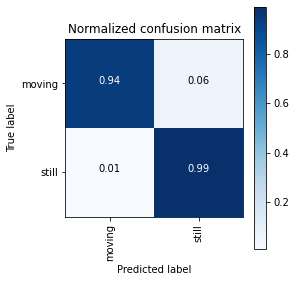

In [15]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
warnings.simplefilter(action = 'ignore', category = ConvergenceWarning)

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2', 'l1']}
logistic_regression = linear_model.LogisticRegression()
logistic_regression_grid = GridSearchCV(logistic_regression, parameters, cv = 3, verbose = 1, n_jobs = -1)
logistic_regression_grid_results =  perform_model(logistic_regression, X_train, y_train, X_test, y_test, labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time:  0:02:32.363434 

Testing time:  0:00:00.004433 

Accuracy:  0.9736723333834812 



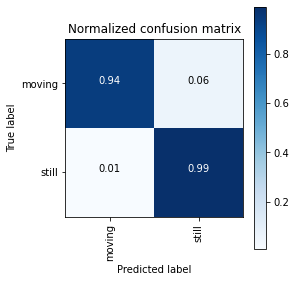

In [16]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
linear_svc = LinearSVC(tol = 0.00005)
linear_svc_grid = GridSearchCV(linear_svc, parameters, n_jobs = -1, verbose = 1)
linear_svc_grid_results = perform_model(linear_svc_grid, X_train, y_train, X_test, y_test, labels)

Training time:  1:14:06.643617 

Testing time:  0:00:13.921169 

Accuracy:  0.9841281781254702 



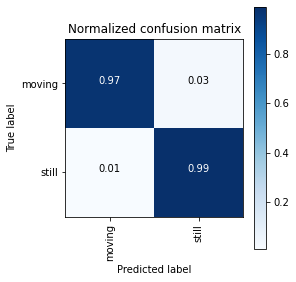

In [19]:
parameters = {'C':[2, 8, 16],'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel = 'rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid = parameters, n_jobs = -1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:00:05.474842 

Testing time:  0:00:00.003941 

Accuracy:  0.9829998495561908 



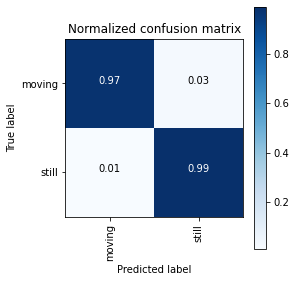

In [20]:
parameters = {'max_depth':np.arange(3, 10, 2)}
decision_tree = DecisionTreeClassifier()
decision_tree_grid = GridSearchCV(decision_tree, parameters, n_jobs = -1)
decision_tree_grid_results = perform_model(decision_tree_grid, X_train, y_train, X_test, y_test, labels)

Training time:  0:35:26.173436 

Testing time:  0:00:00.698946 

Accuracy:  0.9856075422496364 



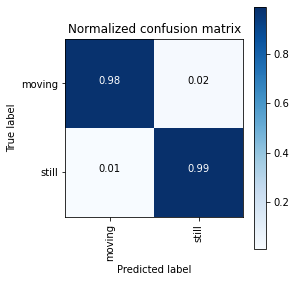

In [21]:
params = {'n_estimators': np.arange(10, 201, 20), 'max_depth': np.arange(3, 15, 2)}
random_forest = RandomForestClassifier()
random_forest_grid = GridSearchCV(random_forest, params, n_jobs = -1)
random_forest_grid_results = perform_model(random_forest_grid, X_train, y_train, X_test, y_test, labels)

In [22]:
print('Accuracy: \n\n')
print('Logistic regression: ', logistic_regression_grid_results['accuracy']*100, '%')
print('Linear SVC: ', linear_svc_grid_results['accuracy']*100, '%')
print('RBF SVM Classifier: ', rbf_svm_grid_results['accuracy']*100, '%')
print('Decision Tree: ', decision_tree_grid_results['accuracy']*100, '%')
print('Random Forest: ', random_forest_grid_results['accuracy']*100, '%')

Accuracy: 


Logistic regression:  97.44997743342861 %
Linear SVC:  97.36723333834813 %
RBF SVM Classifier:  98.41281781254702 %
Decision Tree:  98.29998495561908 %
Random Forest:  98.56075422496365 %
